# Intro

Similar to mints, but actually more interesting, since it involves actual transfers and transactions with eth

In [1]:
import os
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import nfts.dataset

from range_analysis import range_analysis

In [3]:
dirname = os.path.dirname(os.path.abspath("__file__"))
DATASET_PATH = os.path.join(dirname, "nfts.sqlite")
ds = nfts.dataset.FromSQLite(DATASET_PATH)

transfers_df = ds.load_dataframe("transfers")
transfers_df['nft_id'] = transfers_df['nft_address'] + "_" + transfers_df['token_id']
transfers_df.drop(['nft_address', 'token_id'], axis=1, inplace=True)

transfers_df.head()

,event_id,transaction_hash,block_number,from_address,to_address,transaction_value,timestamp,nft_id
0,cd816651-56b2-4ed9-887c-c83de732428d,0x0c73daad5e6946e6b2f1374846d6ba3025d6e6a2569f...,12936373,0x25f1d709b329C7349b8209851E90eFa3a7f60178,0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa,0.0,1627776481,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205_668...
1,82cc5228-eb80-4e0d-9f6f-e644dec3ab06,0x0c73daad5e6946e6b2f1374846d6ba3025d6e6a2569f...,12936373,0x0737E7162C88E9FBB963334e4Bfe6e97447fF811,0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa,0.0,1627776481,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205_119...
2,6e1f9cc4-d1df-4a6b-972d-a20765beb326,0x0c73daad5e6946e6b2f1374846d6ba3025d6e6a2569f...,12936373,0xA0fEc186c4b3FAd39ca373dFdd52E79C2495F2c3,0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa,0.0,1627776481,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205_154...
3,43dc27a7-a72d-4894-809c-e868de05f7ee,0x0c73daad5e6946e6b2f1374846d6ba3025d6e6a2569f...,12936373,0x90bE22069560A9bAd99543B4A922d1FE34Ae84E9,0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa,0.0,1627776481,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205_799...
4,47b7839b-9b87-442d-b2c1-9ebedcad8e06,0x0c73daad5e6946e6b2f1374846d6ba3025d6e6a2569f...,12936373,0xA8E9C42Ebb915EeEC5080B7Bcc5D844475595091,0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa,0.0,1627776481,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205_112...


# Top Transfer Addresses

In [4]:
transfers_stats_df = ds.load_dataframe("transfer_statistics_by_address")
transfers_stats_df.sort_values('transfers_out', inplace=True, ascending=False)
transfers_stats_df.head()

,address,transfers_out,transfers_in
80340,0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5,139631,2
100670,0x327305A797d92a39cEe1a225D7E2A1cC42B1a8fA,103374,0
457654,0xcDA72070E455bb31C7690a170224Ce43623d0B6f,36105,76631
382817,0xE052113bd7D7700d623414a0a4585BCaE754E9d5,31725,9490
431383,0xb1690C08E213a35Ed9bAb7B318DE14420FB57d8C,22580,13892


In [5]:
transfers_stats_df.sort_values('transfers_in', inplace=True, ascending=False)
transfers_stats_df.head()

,address,transfers_out,transfers_in
0,0x0000000000000000000000000000000000000000,0,118931
457654,0xcDA72070E455bb31C7690a170224Ce43623d0B6f,36105,76631
357213,0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa,1,74608
6,0x000000000000000000000000000000000000dEaD,4,20826
431383,0xb1690C08E213a35Ed9bAb7B318DE14420FB57d8C,22580,13892


# NFTs with Multiple Transfers

In [6]:
transfers_count_df = transfers_df.groupby(['nft_id'], as_index=False).size().rename(columns={'size':'num_transfers'})
transfers_count_df.sort_values(['num_transfers'], inplace=True, ascending=False)

transfers_count_df.head()

,nft_id,num_transfers
1959343,0xACd3CF818EFe8ddce84C585ddCB147c4C844D3b3_0,272
1135873,0x60F80121C31A0d46B5279700f9DF786054aa5eE5_120...,72
2470289,0xb7F7F6C52F2e2fdb1963Eab30438024864c313F6_639,72
2470073,0xb7F7F6C52F2e2fdb1963Eab30438024864c313F6_3920,67
2470503,0xb7F7F6C52F2e2fdb1963Eab30438024864c313F6_8476,65


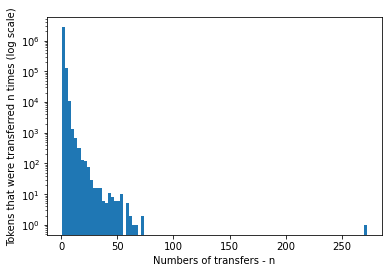

In [7]:
plt.xlabel('Numbers of transfers - n')
plt.ylabel('Tokens that were transferred n times (log scale)')
_,_,_ = plt.hist(transfers_count_df['num_transfers'], bins=100, log=True)

In [8]:
transfers_distribution_list = []

# all tokens transferred
transfers_distribution_list.append(range_analysis(transfers_count_df, 1))
# tokens transferred more than 1 time
transfers_distribution_list.append(range_analysis(transfers_count_df, 2))

for i in [1, 2, 5, 9]:
    transfers_distribution_list.append(range_analysis(transfers_count_df, 1, i))

# tokens transferred more than 10 times
transfers_distribution_list.append(range_analysis(transfers_count_df, 10))

ownership_distribution_df = pd.DataFrame(transfers_distribution_list, columns=['transfers', 'tokens transferred', '% of tokens transferred', 'number of transfers', '% of transfers'])
ownership_distribution_df

,transfers,tokens transferred,% of tokens transferred,number of transfers,% of transfers
0,1 <= n,2860215,100.0%,4514729,100.0%
1,2 <= n,1021237,35.7%,2675751,59.27%
2,n = 1,1838978,64.3%,1838978,40.73%
3,1 <= n <= 2,2490623,87.08%,3142268,69.6%
4,1 <= n <= 5,2833661,99.07%,4315158,95.58%
5,1 <= n <= 9,2857353,99.9%,4473941,99.1%
6,10 <= n,2862,0.1%,40788,0.9%


## Value change over Time

In [9]:
transfers_costs_df = transfers_df.groupby(['nft_id'], as_index=False).agg(mean_cost=pd.NamedAgg(column='transaction_value', aggfunc="mean"), min_cost=pd.NamedAgg(column='transaction_value', aggfunc="min"), max_cost=pd.NamedAgg(column='transaction_value', aggfunc="max"))

transfers_costs_df = transfers_costs_df.merge(transfers_count_df, on='nft_id')

transfers_costs_df['mean_cost_eth'] = transfers_costs_df['mean_cost'] / (10**18)
transfers_costs_df['min_cost_eth'] = transfers_costs_df['min_cost'] / (10**18)
transfers_costs_df['max_cost_eth'] = transfers_costs_df['max_cost'] / (10**18)
transfers_costs_df.drop(['mean_cost', 'min_cost', 'max_cost'], axis=1, inplace=True)

transfers_costs_df.sort_values('num_transfers', inplace=True, ascending=False)

transfers_costs_df.head()


,nft_id,num_transfers,mean_cost_eth,min_cost_eth,max_cost_eth
1959343,0xACd3CF818EFe8ddce84C585ddCB147c4C844D3b3_0,272,0.000000,0.0,0.000000
1135873,0x60F80121C31A0d46B5279700f9DF786054aa5eE5_120...,72,0.000071,0.0,0.005125
2470289,0xb7F7F6C52F2e2fdb1963Eab30438024864c313F6_639,72,0.994722,0.0,21.012500
2470073,0xb7F7F6C52F2e2fdb1963Eab30438024864c313F6_3920,67,0.005373,0.0,0.100000
2470503,0xb7F7F6C52F2e2fdb1963Eab30438024864c313F6_8476,65,0.031077,0.0,0.300000


Analysis of relevant tokens (good number of transfers) to analyze change of value over time

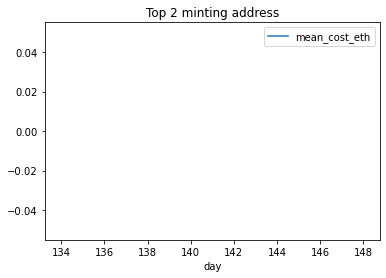

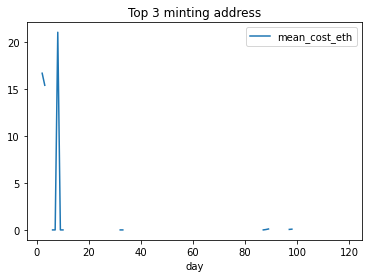

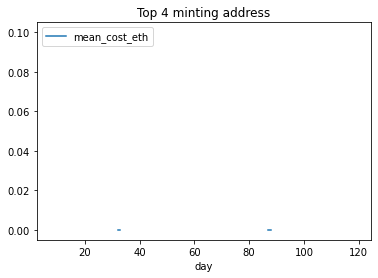

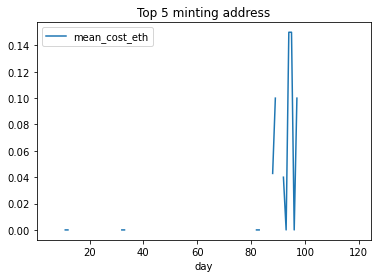

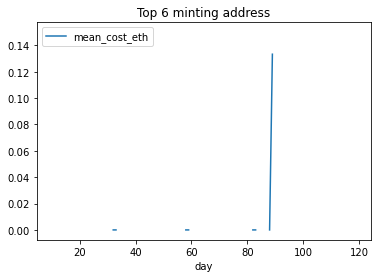

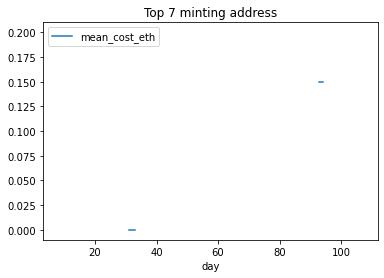

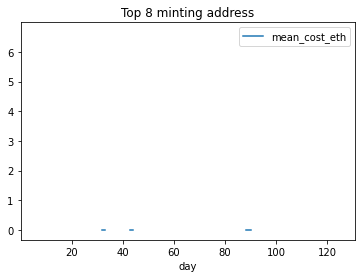

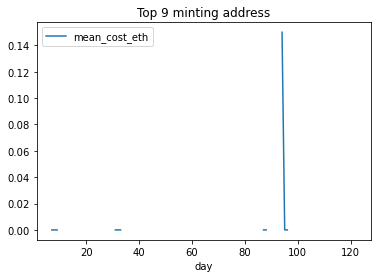

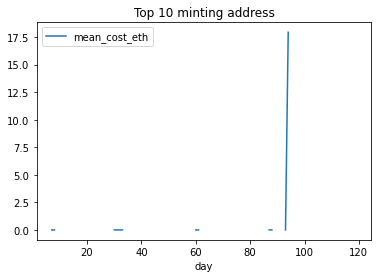

In [18]:
# relevant_transfers_costs_df = transfers_costs_df['num_transfers' > 1]

# for each nft_id with num_transfers > x && mean_cost_eth > 0
    # create df with all his transfers, oredered by timestamp and with trabsaction_value_eth column

min_timestamp = transfers_df['timestamp'].min()
day_length = 60*60*24

for i in range(10) :
    # mints from i-th top address
    current_nft_df = transfers_df[transfers_df.nft_id == (transfers_costs_df.iloc[i].nft_id)]
    
    # skip if mints are not charged
    if current_nft_df['transaction_value'].mean() == 0:
        continue

    # groupby parameters
    min_timestamp_rel = current_nft_df['timestamp'].min()
    max_timestamp_rel = current_nft_df['timestamp'].max()

    starting_day = int((min_timestamp_rel - min_timestamp) / day_length)

    # grouping by a range of timestamp (every group corresponds to 1 day of minting)
    top_cost_fluctuations_df = current_nft_df.groupby(pd.cut(current_nft_df['timestamp'], np.arange(min_timestamp_rel, max_timestamp_rel+day_length, day_length))).agg(mean_cost=pd.NamedAgg(column='transaction_value', aggfunc="mean"))
    top_cost_fluctuations_df.sort_values('timestamp', inplace=True)
    top_cost_fluctuations_df.insert(0, 'day', range(starting_day, starting_day + len(top_cost_fluctuations_df)))
   
    # cost conversion to eth
    top_cost_fluctuations_df['mean_cost_eth'] = top_cost_fluctuations_df['mean_cost'] / (10**18)
    top_cost_fluctuations_df.drop(['mean_cost'], axis=1, inplace=True)

    top_cost_fluctuations_df.plot('day', 'mean_cost_eth')
    plt.title("Top " + str(i+1) + " nft transferred")
    plt.show()

# Conclusions